In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#from pandas.io.data import DataReader
from pandas_datareader import data as pdr

In [3]:
from datetime import datetime

In [4]:
from __future__ import division

In [5]:
end = datetime.now()
#class method: datetime.now([tz])
#Return the current local date and time
print end

start = datetime(end.year-1, end.month, end.day)
#class attribute: date.day
#Between 1 and the number of days in the given month of the given year.
print start

#class datetime(): A datetime object is a single object containing all the information from a date object and a time object.
#example:
#datetime(2002, 8, 19)


#Hence, we specify that 'end' is the current datetime and 'start' is one year ago.


2016-11-26 03:36:00.482741
2015-11-26 00:00:00


In [6]:
AAPL = pdr.get_data_yahoo('AAPL', start, end)
GOOG = pdr.get_data_yahoo('GOOG', start, end)
MSFT = pdr.get_data_yahoo('MSFT', start, end)
AMZN = pdr.get_data_yahoo('AMZN', start, end)

#tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
#for ticker in tech_list:
    #tech_list=pdr.get_data_yahoo(ticker,start,end)


In [7]:
AAPL.head()
#AAPL.describe()
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2015-11-27 to 2016-11-25
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


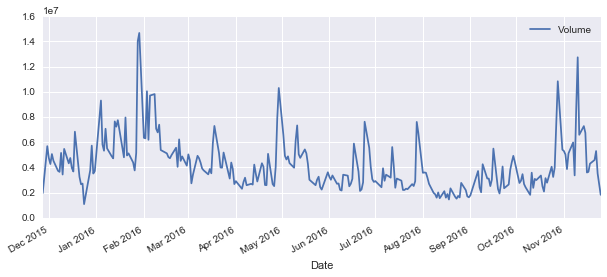

In [8]:
Amazon = AMZN.Volume.plot(legend='True', figsize=(10,4))


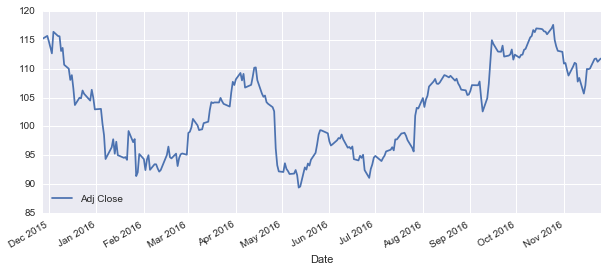

In [9]:
AAPL['Adj Close'].plot(legend='True', figsize=(10,4))

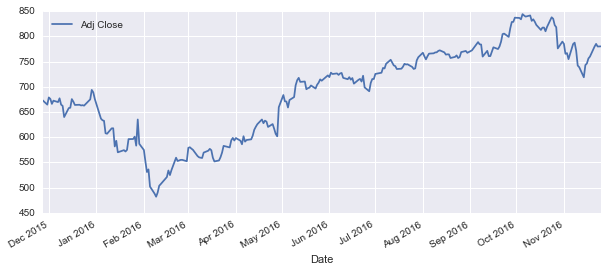

In [10]:
AMZN['Adj Close'].plot(legend='True', figsize=(10,4))

In [11]:
ma_day =[10,20,50]

In [12]:
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    #call string version of that ma number
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma).mean()

AAPL.tail()

,Open,High,Low,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2016-11-18,109.720001,110.540001,109.660004,110.059998,27404300,110.059998,109.138999,111.084474,112.592846
2016-11-21,110.120003,111.989998,110.010002,111.730003,29119100,111.730003,109.270999,110.818522,112.729417
2016-11-22,111.949997,112.419998,111.400002,111.800003,25922600,111.800003,109.345000,110.526223,112.817446
2016-11-23,111.360001,111.510002,110.330002,111.230003,27387900,111.230003,109.380000,110.337745,112.818064
2016-11-25,111.129997,111.870003,110.949997,111.790001,11424400,111.790001,109.780000,110.232483,112.754271


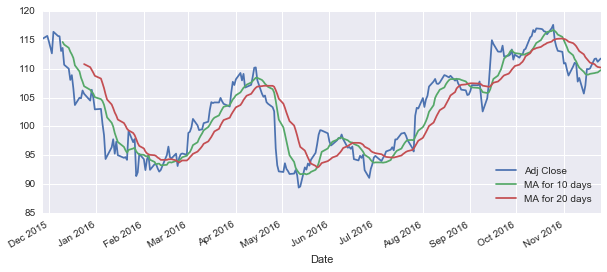

In [13]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days']].plot(subplots=False, figsize=(10,4))

#Study crossovers and predict momentum
#more number of days in moving avg, smoother line of graph

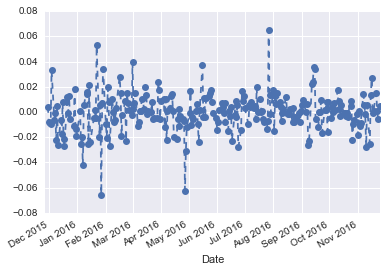

In [14]:
#Daily returns
AAPL['Daily Returns'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Returns'].plot(linestyle="--", marker='o')

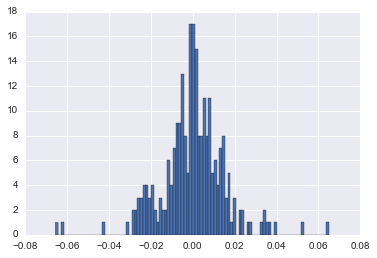

In [15]:
AAPL['Daily Returns'].hist(bins=100)

In [16]:
#DF = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)
#print DF['Adj Close'].head()
#or

closing_df = pdr.get_data_yahoo(['AAPL','GOOG','MSFT','AMZN'], start, end)['Adj Close']
print closing_df.head()

                  AAPL        AMZN        GOOG       MSFT
Date                                                     
2015-11-27  115.245871  673.260010  750.260010  52.489673
2015-11-30  115.725211  664.799988  742.599976  52.898454
2015-12-01  114.786099  679.059998  767.039978  53.745221
2015-12-02  113.749172  676.010010  762.380005  53.735486
2015-12-03  112.692677  666.250000  752.539978  52.752462


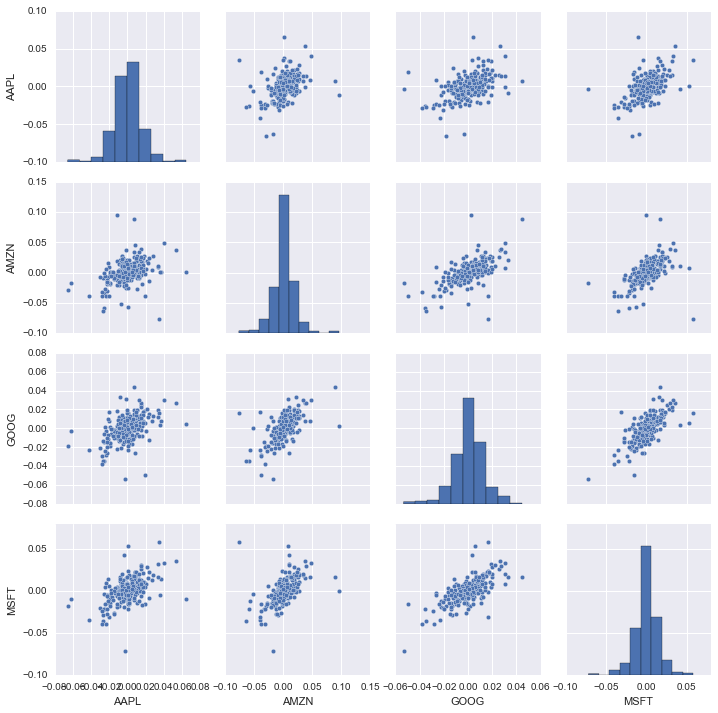

In [17]:
#closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']
tech_rets = closing_df.pct_change()
#pct_change gives percent change over given number of periods.
sns.pairplot(tech_rets.dropna())

/Users/shambhavikumar/anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/Users/shambhavikumar/anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


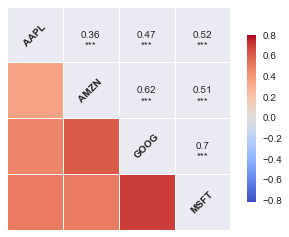

In [18]:
sns.corrplot(tech_rets.dropna(), annot=True)

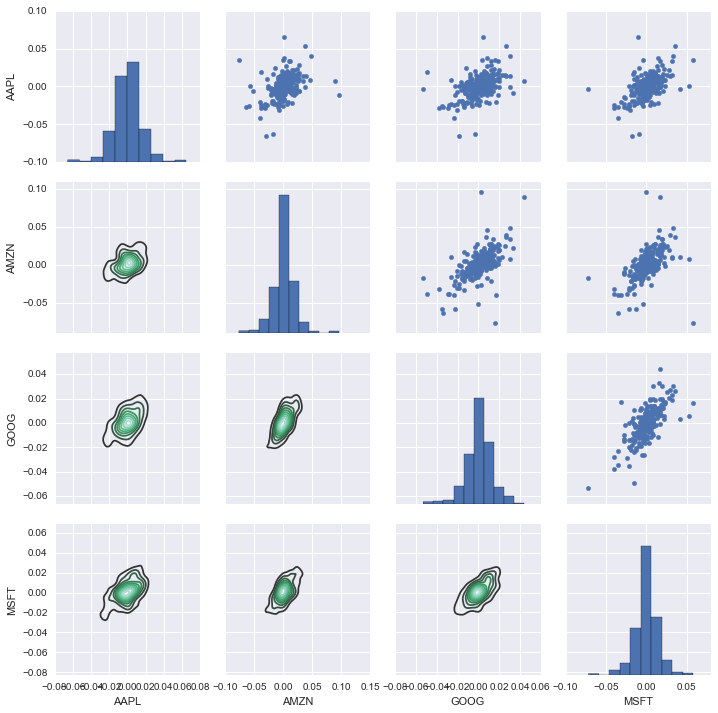

In [19]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter)
returns_fig.map_lower(sns.kdeplot)
returns_fig.map_diag(plt.hist)

In [20]:
#daily_closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Close']

daily_closing_df = pdr.get_data_yahoo(['AAPL','GOOG','MSFT','AMZN'], start, end)['Close']

#tech_rets = pdr.DataReader.pct_change()
#returns_fig = sns.PairGrid(tech_rets.dropna())
#returns_fig.map_upper(plt.scatter)
#returns_fig.map_lower(sns.kdeplot)
#returns_fig.map_diag(plt.hist)

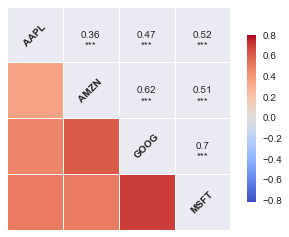

In [21]:
sns.corrplot(tech_rets.dropna(),annot=True)
#All tech stocks are positively correlated

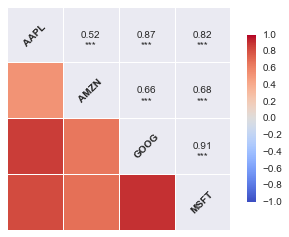

In [22]:
sns.corrplot(closing_df.dropna(),annot=True)

In [23]:
rets = tech_rets.dropna()

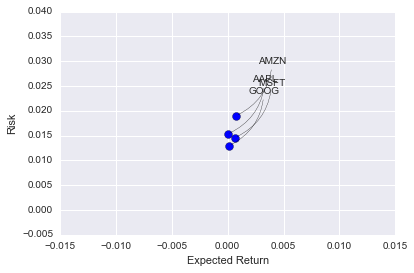

In [27]:
area = np.pi*20
plt.scatter(rets.mean(), rets.std(), s = area)

#https://www.mathworks.com/help/matlab/ref/scatter.html?s_tid=gn_loc_drop

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
                 label,
                 xy=(x, y), 
                 xytext=(50, 50),
                 textcoords='offset points',
                 arrowprops=dict(arrowstyle= '-', connectionstyle = 'arc3, rad=-0.3'),
                 horizontalalignment='right',
                 verticalalignment='bottom',
                 )
    


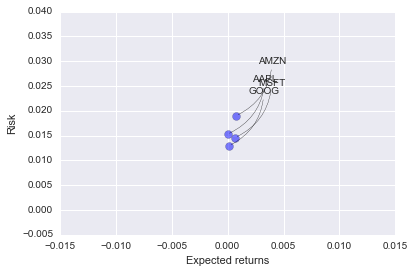

In [34]:
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(), s=area, alpha = 0.5)
#alpha is for transparency
#s gives radius of plotted point

# To give x and y limits of the plot 
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

In [35]:
# The 0.05 empirical quantile of daily returns
rets['AAPL'].quantile(0.05)

-0.024537293360507806

In [36]:
#time horizon
days = 365

#delta
dt = 1/days

#drift
mu = rets.mean()['GOOG']

#volatility of the stock
sigma = rets.std()['GOOG']

In [49]:
def stock_monte_carlo(start_price,days,mu,sigma):

    #price array
    price = np.zeros(days)
    price[0] = start_price
    #shock and drift
    shock = np.zeros(days)
    drift = np.zeros(days)
 
    for x in xrange(1,days):
        
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

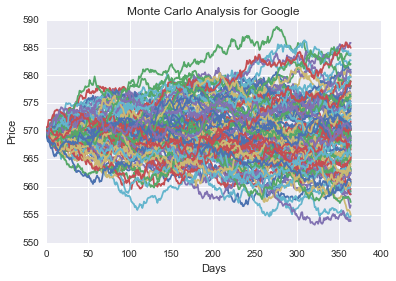

In [50]:
start_price = 569.85

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [51]:
runs = 10000

#empty matrix to hold the end price data
simulations = np.zeros(runs)

#To set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in xrange(runs):    
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

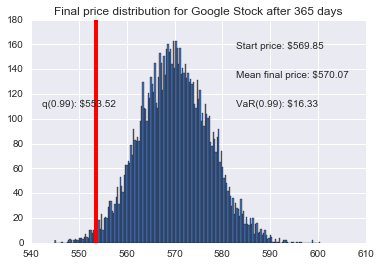

In [52]:
q = np.percentile(simulations, 1)
plt.hist(simulations,bins=200)
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

plt.title("Final price distribution for Google Stock after %s days" % days);